# Ridge Regresyon

* Amaç hata kareler toplamını minimize eden katsayıları, bu katsayılara ceza uygulayarak bulmaktır.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
df = pd.read_csv("hitters.csv")
df = df.dropna()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [3]:
df.shape

(263, 20)

* Veri seti içerisindeki kategorik değişkenleri **dummy** değişkene dönüştürüyoruz.
* Kategorik değişkenlerin sağlayacak olduğu bilgiyi bu şekilde daha iyi alıyoruz.

In [4]:
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
dms.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


* Bağımlı ve bağımsız değişkenleri oluşturuyoruz.

In [5]:
y = df["Salary"]
X = df.drop(["Salary","League","Division","NewLeague"], axis = 1).astype("float64")
X = pd.concat([X, dms[["League_N","Division_W","NewLeague_N"]]], axis = 1)
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


* **alpha (⋋)** değeri **0.01** olduğu zaman karşılık gelen katsayılara bakacağız.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

ridge_model = Ridge(alpha = 0.1).fit(X_train, y_train)
ridge_model

Ridge(alpha=0.1)

* Bağımsız Değişkenler

In [7]:
ridge_model.coef_

array([-1.63346216e+00,  5.63196330e+00,  8.30202632e+00, -2.53802743e+00,
       -3.74227196e-02,  6.51741433e+00, -4.35232932e+00, -2.27419258e-01,
        9.80707437e-01,  2.20349219e-01,  8.97037636e-01, -1.30023997e-01,
       -6.79294917e-01,  2.27202440e-01,  3.68436664e-01, -5.72390626e+00,
        4.79362271e+01, -9.88461360e+01, -2.07797174e+01])

* Bağımlı Değişken

In [8]:
ridge_model.intercept_

155.08538182651034

* Şimdi oluşturacağımız **⋋** değerlerine karşılık gelen katsayıların nasıl değiştiğini gözlemliyoruz.

In [9]:
lambdalar = 10**np.linspace(10, -2, 100)*0.5
lambdalar

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [10]:
ridge_model = Ridge()
katsayilar = []

for i in lambdalar:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train, y_train)
    katsayilar.append(ridge_model.coef_)

* **ax.set_xscale("log"):** Katsayılar birbirinden farklı olduğu için hepsini gözlemleyebilmek için ölçek değiştirme işlemi yapıyoruz.
* **Ridge Regresyon** anlamsız parametreleri sıfıra yaklaştırır.

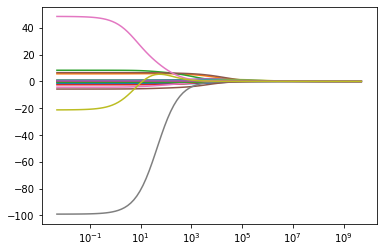

In [11]:
ax = plt.gca()
plt.gca().plot(lambdalar, katsayilar)
ax.set_xscale("log")

### Tahmin

In [12]:
ridge_model = Ridge().fit(X_train, y_train)
y_pred = ridge_model.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))

293.4220166833892

### Cross-Validation

* Bu kısımda elde ettiğimiz hataların doğrulu daha fazladır.

In [13]:
np.sqrt(np.mean(-cross_val_score(ridge_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))

338.6328116479465

### Test Hatası

In [14]:
y_pred = ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

363.22854657691124

### Model Doğrulama (Model Tuning)

In [15]:
ridge_model = Ridge().fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

363.22854657691124

* Lambda (⋋) değerlerini bulmaya çalışıyoruz.

In [16]:
lambdalar1 = np.random.randint(0, 1000, 100)
lambdalar2 = 10**np.linspace(10, -2, 100)*0.5

* **neg_mean_squared_error:** Hata Kareler Ortalaması
* **normalize:** Standartlaştırma

In [17]:
model_cv = RidgeCV(alphas = lambdalar2, scoring = "neg_mean_squared_error", cv = 10, normalize = True).fit(X_train, y_train)
model_cv

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=10, normalize=True, scoring='neg_mean_squared_error')

In [18]:
model_cv.alpha_

0.01155064850041579

* Bu lambda değerini kullanarak final modelini oluşturuyoruz.

In [19]:
model_tuned = Ridge(alpha = model_cv.alpha_).fit(X_train, y_train)
y_pred = model_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

363.17879347163824

In [20]:
model_cv = RidgeCV(alphas = lambdalar1, scoring = "neg_mean_squared_error", cv = 10, normalize = True).fit(X_train, y_train)
model_cv

RidgeCV(alphas=array([916, 654, 827, 449, 895, 453, 797, 347, 583,  52, 926,  11, 919,
       496, 799, 429, 776, 278, 781, 975, 623, 377, 567, 458, 610, 213,
       842, 954, 311, 795, 794, 356, 672, 909, 234, 823,  38,  16, 293,
       443,  35, 313, 571,  18, 524, 265, 434,  17, 144, 464, 364, 221,
       386, 967, 590, 114,  20, 917, 528, 284, 127, 863, 312,   3, 687,
       799, 755, 609, 370, 892, 393, 883, 755, 831, 173, 542,  52, 967,
       806, 404, 188, 635, 433, 912, 422, 550,  46, 805, 436, 540,  69,
       741, 607,  77, 284, 900, 986, 901, 643, 822]),
        cv=10, normalize=True, scoring='neg_mean_squared_error')

In [21]:
model_cv.alpha_

3

In [22]:
model_tuned = Ridge(alpha = model_cv.alpha_).fit(X_train, y_train)
y_pred = model_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

363.38247587513143